# Agenda
# 1.Import necessary files required
# 2.Import & Visualize Twets data (Label charts,Observations Frequency chart, Observations Word cloud & Sentiement Distribution in Tweet data)
# 3.Data Preprocessing
# 4.Lexicon model
# 5.Random forest model
# 6.Naive bayes
# 7.Topic modeling

# 1.import necessary files required

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
#Magic Command to print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 2.Import and Visualize data

In [3]:
data=pd.read_csv('F://Data/TweetSent.csv',sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 2 columns):
Tweet       5967 non-null object
Category    5967 non-null object
dtypes: object(2)
memory usage: 93.3+ KB


In [4]:
print('Dataset size:',data.shape)
print('Columns are:',data.columns)

Dataset size: (5967, 2)
Columns are: Index(['Tweet', 'Category'], dtype='object')


In [5]:
data.head()
print(len(data))

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


5967


In [6]:
# examine the class distribution
data.Category.value_counts().sort_index()

negative     956
neutral     2123
positive    2888
Name: Category, dtype: int64

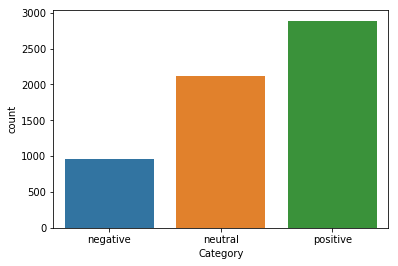

In [7]:
sns.countplot(x = 'Category', data = data)

In [8]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


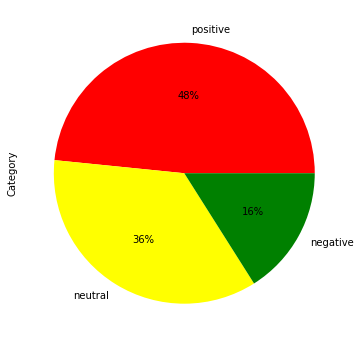

In [9]:
data.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [10]:
#tweets = data['Tweet']
#labels = data['Category']
#tweets.shape
tweets_text=data.drop(['Category'], axis=1)
tweets_text.head()
print(len(data))

,Tweet
0,Not Available
1,IOS 9 App Transport Security. Mm need to check...
2,"Mar if you have an iOS device, you should down..."
3,@jimmie_vanagon my phone does not run on lates...
4,Not sure how to start your publication on iOS?...


5967


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 5967): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',data.Tweet[i])
  # convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # split sentences into words
  tweets_text_cln = tweets_text_cln.split()
  # remove English stop words
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences
  tweets_text_cln = " ".join(tweets_text_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets_text_cln)
#print(corpus) 

In [13]:
bagofwords=[]
for i in range (0,5967):
    words = corpus[i].split()
    bagofwords.append(words)

In [14]:
bagofwords[0]

['available']

In [15]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['available', 'ios', 'app', 'transport', 'security', 'mm', 'need', 'check', 'rd', 'party']

Most commonly occuring words and frequency



[('may', 1031),
 ('tomorrow', 746),
 ('th', 675),
 ('available', 571),
 ('day', 492),
 ('st', 381),
 ('im', 375),
 ('see', 349),
 ('time', 328),
 ('like', 325),
 ('going', 308),
 ('amp', 308),
 ('one', 278),
 ('new', 274),
 ('friday', 273),
 ('sunday', 265),
 ('get', 262),
 ('rd', 223),
 ('nd', 214),
 ('night', 213)]

In [16]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,may,1031
1,tomorrow,746
2,th,675
3,available,571
4,day,492


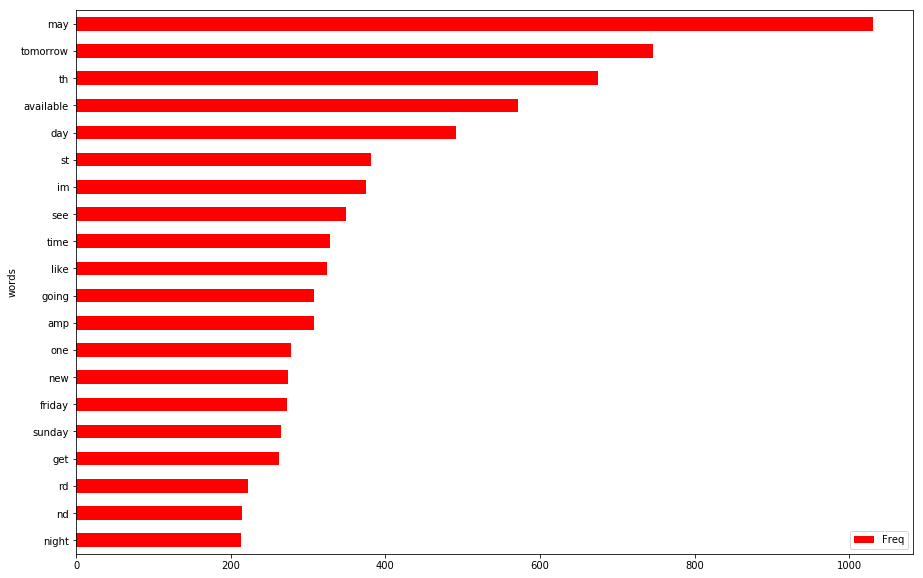

In [17]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='red')
plt.show();

In [18]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

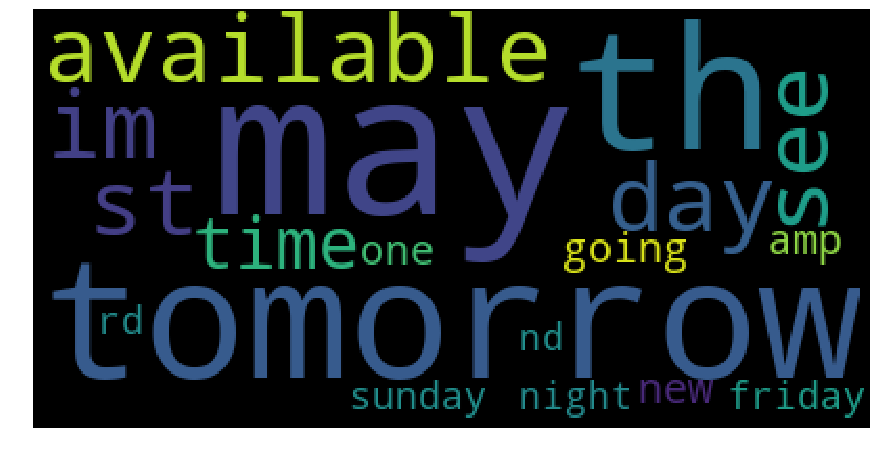

In [19]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
from textblob import TextBlob
sentiment_text=[TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.4
available


In [21]:
sentiments = [[tweet.sentiment.polarity,str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','Tweet_Text'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,Tweet_Text
3764,1.0,seinfelds contest may one best episodes andthe...
1163,1.0,r best negotiatorwish u instead kerry went
1184,1.0,may best person job transparency means kerry a...
5904,1.0,today may best day life get see zlatan
3733,1.0,popcorn seinfeld sounds like perfect friday ni...
4998,1.0,tory saw physics textbook said wish best luck ...
4080,1.0,playing star wars monopoly listening star wars...
4679,1.0,tgif celebrations tomorrow farragut sq th amp ...
2905,1.0,one greatest ux innovators oracles mdc th anni...
1795,1.0,whoaaaa messis show messi nd goal messi scored...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F76BA7E10>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution in Tweet data')

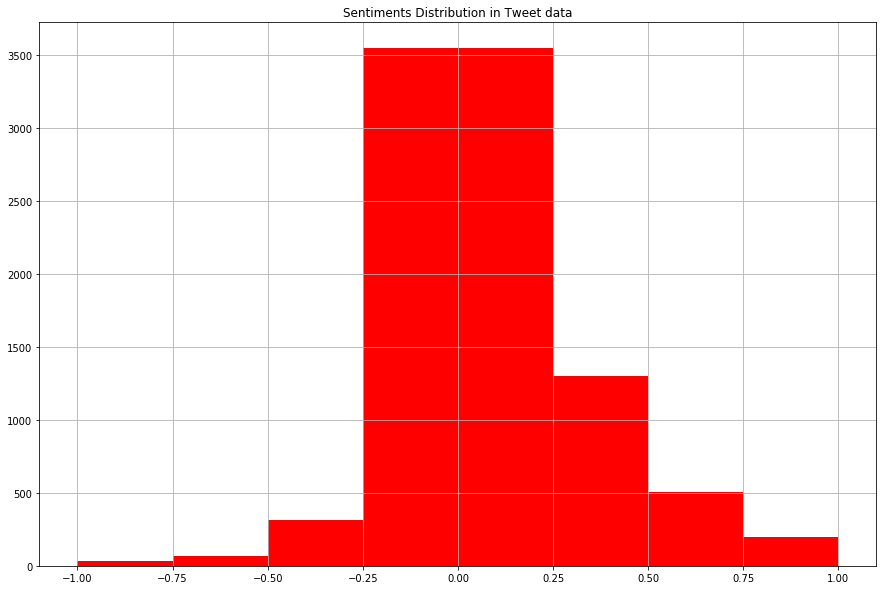

In [22]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='red')
plt.title('Sentiments Distribution in Tweet data')
plt.show()

# 3.Data Preprocessing
# 4.Lexicon model

In [23]:
lex_file = open("F:\\Data\\AFINN-111.csv")

In [24]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (tweets):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [25]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [26]:
strength = []
for tweet in word_list:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [30]:
senti_matrix = pd.DataFrame(strength, data.Tweet)

In [31]:
senti_matrix[0:10]

,0
Tweet,
Not Available,0
IOS 9 App Transport Security. Mm need to check if my 3rd party network pod supports it http://t.co/fmtcfUAdgj,2
"Mar if you have an iOS device, you should download our app too: http://t.co/gl3tn2uDnD",0
@jimmie_vanagon my phone does not run on latest IOS which may account for problem the other day .. time it was replaced,-2
Not sure how to start your publication on iOS? We'll be live helping with ask me anything sessions today and Friday http://t.co/KPqqGjjh3x,2
"Two Dollar Tuesday is here with Forklift 2, QuickKey for iOS and Suite for Pages for just $1.99 today: http://t.co/BNMFOEACw5",0
"If you're not already signed up to test my iOS game, nows your chance! https://t.co/eZhIU6EDpQ",2
"YouTube Gaming Officially Launches On Web, Android, iOS On August 26: YouTube is finally going to r... http://t.co/qbhyA3kaWP #webseries",0
YouTube Gaming Launches Tomorrow with iOS and Android Apps to Go Head-to-Head with Twitch http://t.co/yZOATToeJC #ios #game,0


# 3.Data Preprocessing

## TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:
## TF  = (Frequency of a word in the document)/(Total words in the document)
## IDF = Log((Total number of docs)/(Number of docs containing the word))

## TF-IDF using the Scikit-Learn Library
## Luckily for us, Python's Scikit-Learn library contains the TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors. The following script performs this:

In [32]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [33]:
#from nltk.corpus import stopwords
#from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
#processed_features = vectorizer.fit_transform(processed_features).toarray()

## In the code above, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

## Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

## Dividing Data into Training and Test Sets
## The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, data.Category, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4773, 1344)
(1194, 1344)
(4773,)
(1194,)


## In the code above we use the train_test_split class from the sklearn.model_selection module to divide our data into training and testing set. The method takes the feature set as the first parameter, the label set as the second parameter, and a value for the test_size parameter. We specified a value of 0.2 for test_size which means that our data set will be split into two sets of 80% and 20% data. We will use the 80% dataset for training and 20% dataset for testing.

## Training the Model
## Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. You can use any machine learning algorithm. However, we will use the Random Forest algorithm, owing to its ability to act upon non-normalized data.
## The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. To do so, we need to call the fit method on the RandomForestClassifier class and pass it our training features and labels, as parameters.

# 5.Random forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Making Predictions and Evaluating the Model
## Once the model has been trained, the last step is to make predictions on the model. To do so, we need to call the predict method on the object of the RandomForestClassifier class that we used for training.

In [38]:
predictions = text_classifier.predict(X_test)

## Finally, to evaluate the performance of the machine learning models, we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

## To find the values for these metrics, we can use classification_report, confusion_matrix, and accuracy_score utilities from the sklearn.metrics library

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 31  99  80]
 [ 21 157 244]
 [ 10  87 465]]
              precision    recall  f1-score   support

    negative       0.50      0.15      0.23       210
     neutral       0.46      0.37      0.41       422
    positive       0.59      0.83      0.69       562

   micro avg       0.55      0.55      0.55      1194
   macro avg       0.52      0.45      0.44      1194
weighted avg       0.53      0.55      0.51      1194

0.5469011725293133


# 6. import and instantiate a Multinomial Naive Bayes model

In [40]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [41]:
%time nb.fit(X_train, y_train)

Wall time: 40.7 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [43]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.5569514237855946

In [44]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 23, 105,  82],
       [ 16, 157, 249],
       [  5,  72, 485]], dtype=int64)

# 7.Topic modeling

# What is Topic Modeling

## Topic modeling is an unsupervised technique that intends to analyze large volumes of text data by clustering the documents into groups. In the case of topic modeling, the text data do not have any labels attached to it. Rather, topic modeling tries to group the documents into clusters based on similar characteristics.

## A typical example of topic modeling is clustering a large number of newspaper articles that belong to the same category. In other words, cluster documents that have the same topic. It is important to mention here that it is extremely difficult to evaluate the performance of topic modeling since there are no right answers. It depends upon the user to find similar characteristics between the documents of one cluster and assign it an appropriate label or topic.

## Two approaches are mainly used for topic modeling: Latent Dirichlet Allocation and Non-Negative Matrix factorization. In the next sections, we will briefly review both of these approaches and will see how they can be applied to topic modeling in Python.

# Latent Dirichlet Allocation (LDA)

## The LDA is based upon two general assumptions:
## 1.Documents that have similar words usually have the same topic
## 2.Documents that have groups of words frequently occurring together usually have the same topic.
## These assumptions make sense because the documents that have the same topic, for instance, Business topics will have words like the "economy", "profit", "the stock market", "loss", etc. The second assumption states that if these words frequently occur together in multiple documents, those documents may belong to the same category.

## Mathematically, the above two assumptions can be represented as:
## Documents are probability distributions over latent topics
## Topics are probability distributions over words

## Before we can apply LDA, we need to create vocabulary of all the words in our data. Remember from the previous section, we could do so with the help of a count vectorizer. Look at the following script:

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(data['Tweet'].values.astype('U'))

## In the script above we use the CountVectorizer class from the sklearn.feature_extraction.text module to create a document-term matrix. We specify to only include those words that appear in less than 80% of the document and appear in at least 2 documents. We also remove all the stop words as they do not really contribute to topic modeling.

In [46]:
#Now let's look at our document term matrix:
doc_term_matrix

<5967x4671 sparse matrix of type '<class 'numpy.int64'>'
	with 50642 stored elements in Compressed Sparse Row format>

## from above output each of 5967 rows is represented as 4671 dimensional vector, which means that our vocabulary has 4671 words.

## Next, we will use LDA to create topics along with the probability distribution for each word in our vocabulary for each topic. Execute the following script:

In [47]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

## In the script above we use the LatentDirichletAllocation class from the sklearn.decomposition library to perform LDA on our document-term matrix. The parameter n_components specifies the number of categories, or topics, that we want our text to be divided into. The parameter random_state (aka the seed) is set to 42 so that we get the results similar.

## Let's randomly fetch words from our vocabulary. We know that the count vectorizer contains all the words in our vocabulary. We can use the get_feature_names() method and pass it the ID of the word that we want to fetch.

## The following script randomly fetches 10 words from our vocabulary:

In [48]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

lied
deadpool
cuz
studio
mildly
speed
particular
reform
store
beast


In [49]:
# Let's find 10 words with the highest probability for the first topic. To get the first topic, 
# you can use the components_ attribute and pass a 0 index as the value:
first_topic = LDA.components_[0]
print(first_topic)

[8.28953342 5.99954922 3.19599853 ... 0.20360365 0.20000881 2.19903749]


In [50]:
top_topic_words = first_topic.argsort()[-10:]
print(top_topic_words)

[ 326 2158 3116 1121 2161 2412 2782 2242 4207 2031]


In [51]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

apple
ios
pope
day
iphone
like
new
just
tomorrow
http


## The words show that the first topic might be about New operating system for apple i phone.

In [52]:
#Let's print the 10 words with highest probabilities for all the five topics:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['apple', 'ios', 'pope', 'day', 'iphone', 'like', 'new', 'just', 'tomorrow', 'http']


Top 10 words for topic #1:
['day', 'minecraft', 'just', 'sunday', 'parade', 'pride', 'sting', 'tomorrow', 'monday', 'http']


Top 10 words for topic #2:
['ukip', 'monsanto', 'ric', 'flair', 'tsipras', 'joe', 'tory', 'biden', 'https', 'http']


Top 10 words for topic #3:
['palin', 'time', 'amp', 'trump', '1st', 'valentine', 'day', 'https', 'obama', 'http']


Top 10 words for topic #4:
['just', 'star', 'day', 'world', 'going', 'friday', 'jurassic', 'http', 'tomorrow', 'available']




## As a final step, we will add a column to the original data frame that will store the topic for the text. To do so, we can use LDA.transform() method and pass it our document-term matrix. This method will assign the probability of all the topics to each document. Look at the following code:

In [53]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(5967, 5)

In [54]:
data['Topic'] = topic_values.argmax(axis=1)

In [55]:
data.head(10)

,Tweet,Category,Topic
0,Not Available,negative,4
1,IOS 9 App Transport Security. Mm need to check...,neutral,0
2,"Mar if you have an iOS device, you should down...",neutral,0
3,@jimmie_vanagon my phone does not run on lates...,negative,0
4,Not sure how to start your publication on iOS?...,positive,4
5,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral,0
6,If you're not already signed up to test my iOS...,neutral,3
7,"YouTube Gaming Officially Launches On Web, And...",neutral,0
8,YouTube Gaming Launches Tomorrow with iOS and ...,neutral,0
9,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral,0


# Non-Negative Matrix Factorization (NMF)
## In the previous section, we saw how LDA can be used for topic modeling. In this section, we will see how non-negative matrix factorization can be used for topic modeling.

## Non-negative matrix factorization is also a supervised learning technique which performs clustering as well as dimensionality reduction. It can be used in combination with TF-IDF scheme to perform topic modeling. In this section, we will see how Python can be used to perform non-negative matrix factorization for topic modeling.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(data['Tweet'].values.astype('U'))

In [57]:
# Once the document term matrix is generated, we can create a probability matrix that contains probabilities of all the words
# in the vocabulary for all the topics. To do so, we can use the NMF class from the sklearn.decomposition module. 
# Look at the following script:

from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [58]:
#As we did in the previous section, let's randomly get 10 words from our vocabulary:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

data
confirms
fight
cause
keyboard
bruh
hoe
response
onstage
owenjones84


In [59]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [60]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

shell
hope
great
students
okay
dvd
threatened
fly
bug
stop


In [61]:
first_topics = nmf.components_[0]
top_topic_words = first_topics.argsort()[-10:]

In [62]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

fee
pre
free
dangerous
elite
correction
android
thanks
valentine
available


In [63]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['fee', 'pre', 'free', 'dangerous', 'elite', 'correction', 'android', 'thanks', 'valentine', 'available']


Top 10 words for topic #1:
['biden', 'sunday', 'like', 'obama', 'new', 'friday', 'https', '1st', 'amp', 'http']


Top 10 words for topic #2:
['want', 'ted', 'taylor', 'swift', 'watch', 'world', 'just', 'jurassic', 'going', 'tomorrow']


Top 10 words for topic #3:
['weekend', 'https', 'tgif', 'monday', 'today', 'sunday', 'friday', 'labor', 'valentine', 'day']


Top 10 words for topic #4:
['think', '3rd', 'better', 'watching', '1st', '2nd', 'time', 'xxl', 'mike', 'magic']




In [64]:
topic_values = nmf.transform(doc_term_matrix)
data['Topics'] = topic_values.argmax(axis=1)
data.head()

,Tweet,Category,Topic,Topics
0,Not Available,negative,4,0
1,IOS 9 App Transport Security. Mm need to check...,neutral,0,1
2,"Mar if you have an iOS device, you should down...",neutral,0,1
3,@jimmie_vanagon my phone does not run on lates...,negative,0,3
4,Not sure how to start your publication on iOS?...,positive,4,1


## As you can see, a topics has been assigned to each review, which was generated using the NMF method.

## Topic modeling is one of the most sought after research areas in NLP. It is used to group large volumes of unlabeled text data. In this article, two approaches to topic modeling have been explained. In this article we saw how Latent Dirichlet Allocation and Non-Negative Matrix Factorization can be used for topic modeling with the help of Python libraries.